<a id='top'></a>

<a href='#import'>Import &amp; Inspect</a> |
<a href='#problem'>Problem Description</a> |
<a href='#eda'>Exploratory Data Analysis</a> |
<a href='#hypotest'>Hypothesis Testing</a> |
<a href='#conclusion'>Conlusion and Documentation</a> |
<a href='#discussion'>Discussion</a>
    
<br>

---

# Import and Load

In [1]:
# Pandas and numpy for data manipulation
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
%matplotlib inline
plt.style.use('fivethirtyeight')

# Internal ipython tool for setting figure size

# Seaborn for visualization
#sns.set(font_scale = 2)

# Splitting data into training and testing

In [75]:
file = 'oasis_long.csv'
df = pd.read_csv(file)

<a href='#top' id='problem'>back to menu</a>

# Problem Description

In this project, we will work with the data collected from a longitudinal study on determining cognitive functionality performance of subject. **The objective is to build a model that can classify cognitve impairment(being demented) successfully and interpret the results to find factors which influence the score.**

The data includes the CDR score, which make this a supervised machine learning task. However, since the scores are to classify the stage of the dementia we will work on a supervised classification setting. In other words, our CDR score is a ordinal data so we treat this task as a classification problem to determine which class a subject falls into.

While there is currently no cure for AD, early, accurate and effective detection of AD is beneficial
for the management of the disease. Structural magnetic resonance imaging (sMRI) plays an important role in distinguishing AD subjects from normal controls (NC), and to distinguish mild cognitive impairment (MCI) subjects who
later convert to AD from those who do not.

<a href='#top' id='eda'>back to menu</a>

# EDA

 >Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. Now that we cleaned and transformed our data we can start off exploring relationships among features. 
>
> Again, our object to create a classification model. Here we want to explore our variables and their influence to the target variable if exists.

In [76]:
# See if gender has an effect 
map_to = {0:'M', 1:'F'}
df['Gender'] = df['M/F'].map(map_to)

In [77]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSE_filled,SES_filled,Gender
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,27,4,M
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,0,88,14,2.0,30.0,0.0,2004,0.681,0.876,30,4,M
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,0,75,12,NaN,23.0,0.5,1678,0.736,1.046,23,4,M
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,0,76,12,NaN,28.0,0.5,1738,0.713,1.010,28,4,M
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,0,80,12,NaN,22.0,0.5,1698,0.701,1.034,22,4,M


## Distribution of the Targer variable

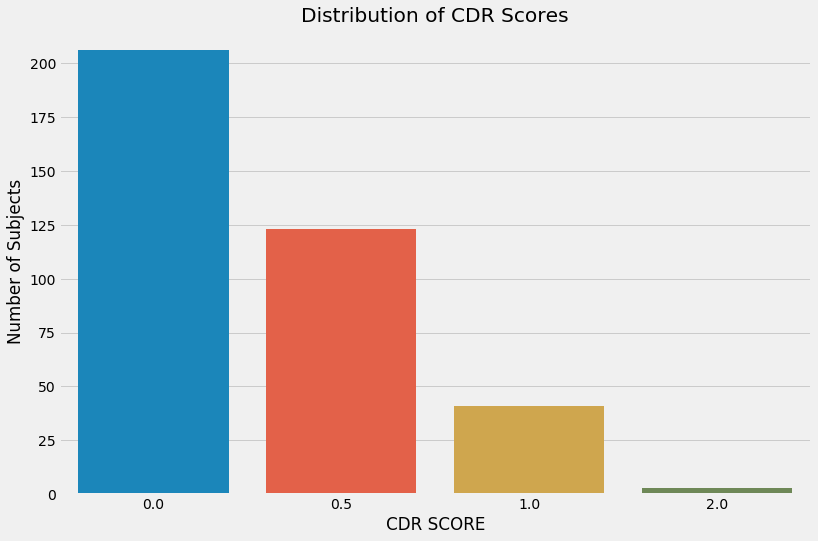

In [126]:
# Look at the classes in CDR
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.countplot(df['CDR'])
plt.title('Distribution of CDR Scores')
plt.xlabel('CDR SCORE')
plt.ylabel('Number of Subjects')
plt.savefig('CDR_dist.png')

> Again, 0 is showing no signs of dementia, 0.5 is for probable Alzheimer's Disease and so on.

>A major part of EDA is searching for relationships between the features and the target. Invastigating covaraiant variables especially ones have significant positive or negative correlation between target_variable is an important task. One way to examine the effect of a categorical variable on the target is through a density plot.
A density plot can be thought of as a smoothed histogram because it shows the distribution of a single variable. We can color a density plot by class to see how a categorical variable changes the distribution. 
>
> Note that this chart also shows that we have a multi-class classification problem where the classes are not uniformly distributed. It is good to note here that a good metric to measure classifier's performance for imbalanced classes is Area Under the Curve. More on that in next sections. However, we will convert multi-class classification problem to binary classification problem in next sections.

## Does socioeconomic class matter?

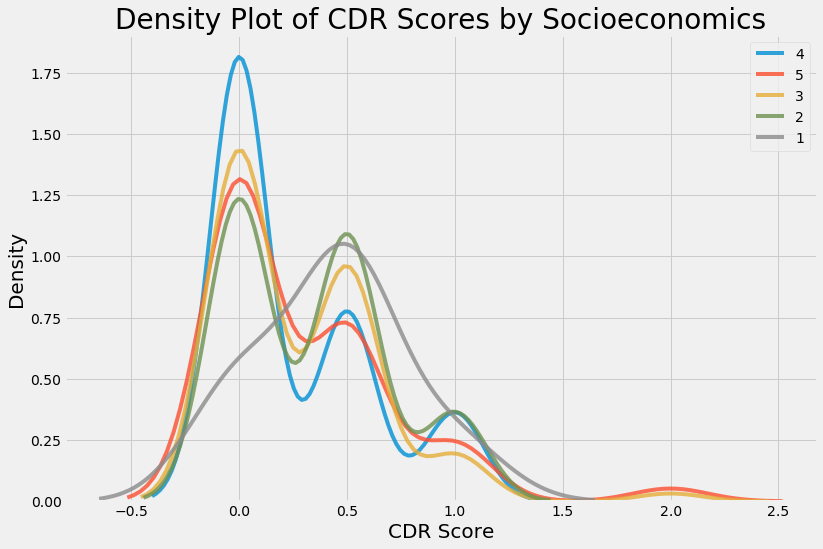

In [127]:
# Create list of indicies of SES counts
ses_ = df['SES_filled'].value_counts()
ses_indexes = list(ses_.index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(12, 8))

# Plot each building
for s in ses_indexes:
    # Select the SES category
    subset = df[df['SES_filled'] == s]
    
    # Density plot of CDR scores
    sns.kdeplot(subset['CDR'],
               label = s, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('CDR Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of CDR Scores by Socioeconomics', size = 28);
#plt.xlim([0,2]);
plt.savefig('SES_CDR.png')

> We can think of Density values (the y-axis) as a value only for relative comparisons between different categories. We see that there are three clusters around CDR scores 0, .5 and 1. We can see that CDR score of 0 are more common in low-socioeconomical group(1)  whereas for high-socioeco group (5) we see that CDR socre of 0.5 is more common than others.

## Does Education Level matter?

In [80]:
# Min and Max years of education among subjects
min_edu = df.loc[df['EDUC']==12]
max_edu = df.loc[df['EDUC']==16]

# Stack them into a combine dataframe
edu_concat = pd.concat([min_edu,max_edu])
edu_concat.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSE_filled,SES_filled,Gender
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,0,75,12,NaN,23.0,0.5,1678,0.736,1.046,23,4,M
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,0,76,12,NaN,28.0,0.5,1738,0.713,1.010,28,4,M
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,0,80,12,NaN,22.0,0.5,1698,0.701,1.034,22,4,M
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,0,80,12,4.0,28.0,0.0,1689,0.712,1.039,28,2,M
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,0,83,12,4.0,29.0,0.5,1701,0.711,1.032,29,2,M


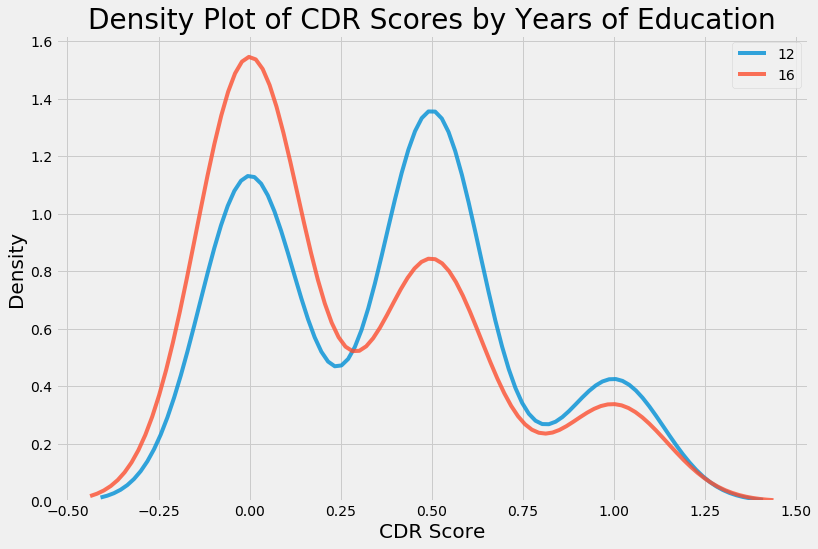

In [128]:
# Create list of indicies of SES counts
edu_= edu_concat['EDUC'].value_counts()
edu_index = list(edu_.index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(12, 8))

# Plot each building
for el in edu_index:
    # Select the SES category
    subset = edu_concat[edu_concat['EDUC'] == el]
    
    # Density plot of CDR scores
    sns.kdeplot(subset['CDR'],
               label = el, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('CDR Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of CDR Scores by Years of Education', size = 28);
#plt.xlim([0,2]);
plt.savefig('EDU_CDR.png')

> Subjects with 12 years of education slightly have high CDR score than the ones with 16 years of education.



##  Does gender have an effect?

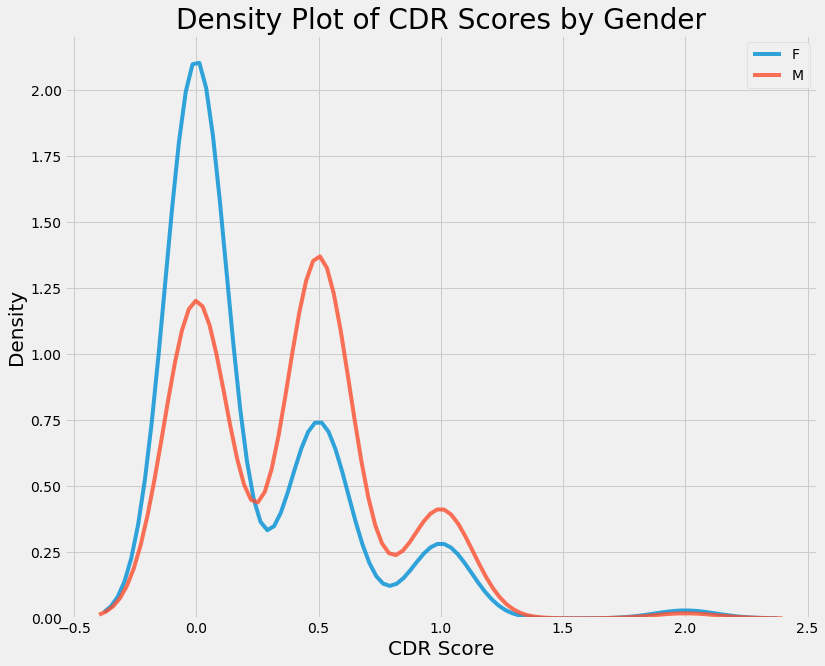

In [129]:
# Create list of indicies of SES counts
gender_= df['Gender'].value_counts()
gender_indicies = list(gender_.index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(12, 10))

# Plot each building
for g in gender_indicies:
    # Select the SES category
    subset = df[df['Gender']==g]
    
    # Density plot of CDR scores
    sns.kdeplot(subset['CDR'],
               label = g, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('CDR Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of CDR Scores by Gender', size = 28, );
plt.savefig('Gender_CDR.png')

> Majority of females seems to be healthier than males. Males seem to distributed almost every phase of the CDR scores. We may think of using **Stratified Sampling** to investigate gender affect more when we are splitting our dataset before applying ML algorithms.

## Relationship Among Continuous Variables

> In order to quantify relationships between variables, we can use the Pearson Correlation Coefficient. This is a measure of the strength and direction of a linear relationship between two variables. A score of +1 is a perfectly linear positive relationship and a score of -1 is a perfectly negative linear relationship. Although the correlation coefficient cannot capture non-linear relationships, it is a good way to start figuring out how variables are related.

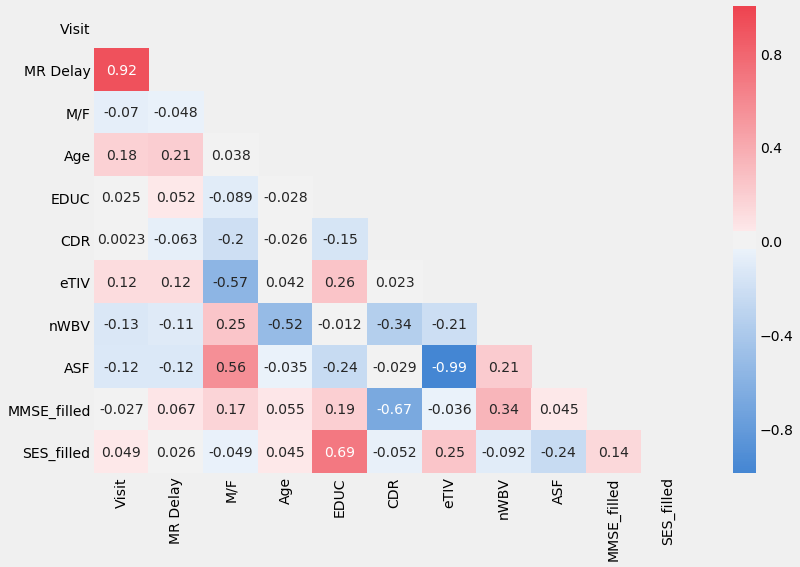

In [130]:
# Compute Pearson correlation coeeficient matrix
corr = df.drop(columns=['MMSE', 'SES'], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the figure
fig, ax = plt.subplots(figsize=(12,8))

# Generate a custom colormap
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio (mask to not display upper triangle part)
sns.heatmap(corr, mask=mask, cmap=cmap, ax=ax, annot=True);
plt.savefig('CorrMatrx.png')

> Between `ASF` and `eTIV` a highly negative correlation exists while  we observe highly positive correlation between `Visit` and `MR Delay` .

### Age vs CDR and MMSE vs CDR 


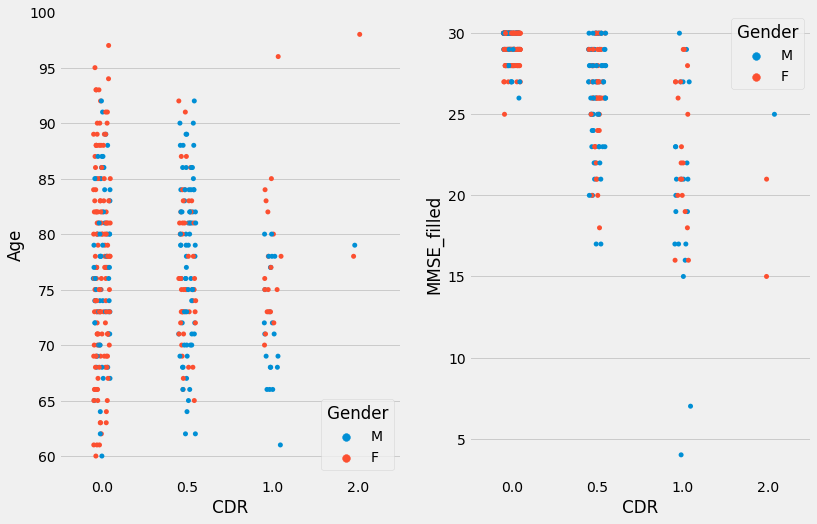

In [132]:
# Age and MMSE test
fig, ax =plt.subplots(1,2, figsize=(12,8))
a = sns.catplot(x='CDR',y='Age',data=df, hue='Gender', ax=ax[0])
b = sns.catplot(x='CDR',y='MMSE_filled',data=df, hue='Gender', ax=ax[1]);
plt.close(a.fig)
plt.close(b.fig)
plt.savefig('Age_CDR')

> Although there is not a quite distinctive pattern between Age and CDR score, we can see that CDR scores for the subjects age around 65 to 85 varies to much i.e. left plot above shows that within this range the CDR score jumps from 0 to 1. Briefly, there is not a pattern that suggests change in Age influences the change in CDR score.
>
> The second plot suggests that the MMSE scores below 25 result in dementia, but the scores above 25 is spread over demented and non-demented classes so the scores above 25 are not distinctive.

### eTIV vs CDR,  ASF vs CDR and  nWBV vs CDR 

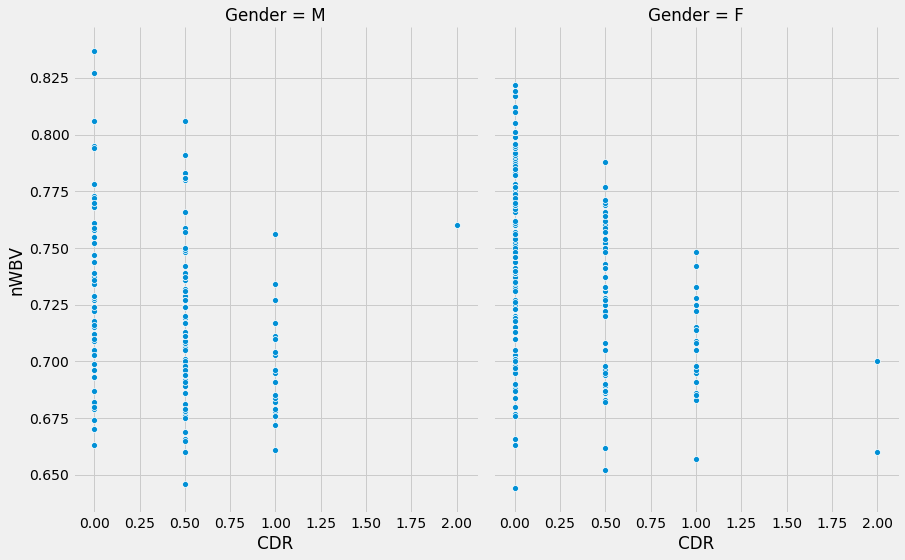

In [133]:
# Female and Male Normalized Whole-Brain Volume vs Dementia Rating 
sns.relplot(x='CDR', y='nWBV', col='Gender', data=df, height=8, aspect=.8);
#plt.subplots_adjust(right=1.25);
plt.savefig('BrainSize-CDR.png')

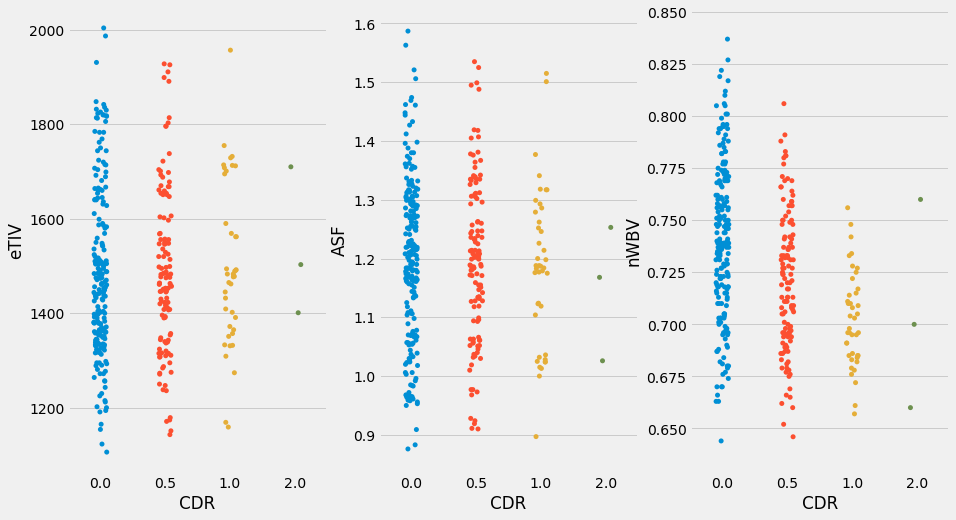

In [86]:
# Age and MMSE test
fig, ax =plt.subplots(1,3, figsize=(12,8))
f1 = sns.catplot(x='CDR',y='eTIV',data=df, ax=ax[0])
f2 = sns.catplot(x='CDR',y='ASF',data=df, ax=ax[1])
f3 = sns.catplot(x='CDR', y='nWBV', data=df, ax=ax[2])
plt.close(f1.fig)
plt.close(f2.fig)
plt.close(f3.fig)
plt.subplots_adjust(right=1.1)

> There is not a certain relationship among variables regards to `CDR` nor a trend that may allow us to investigate factors of that trend. 
>
> By looking at the third chart above we may infer that `nWBV` is getting slightly smaller as the `CDR` score increasing. However, we can not say that small brain volumes would get higher Clinical Dementia Score (CDR). However, studies suggest that `nWBV` the volume of a brain with dementia decreases over time but we are not able to observe that from this plot. In fact the Brain Volume spread out within each CDR score. 

### Relations Among Continuous Predictors Again

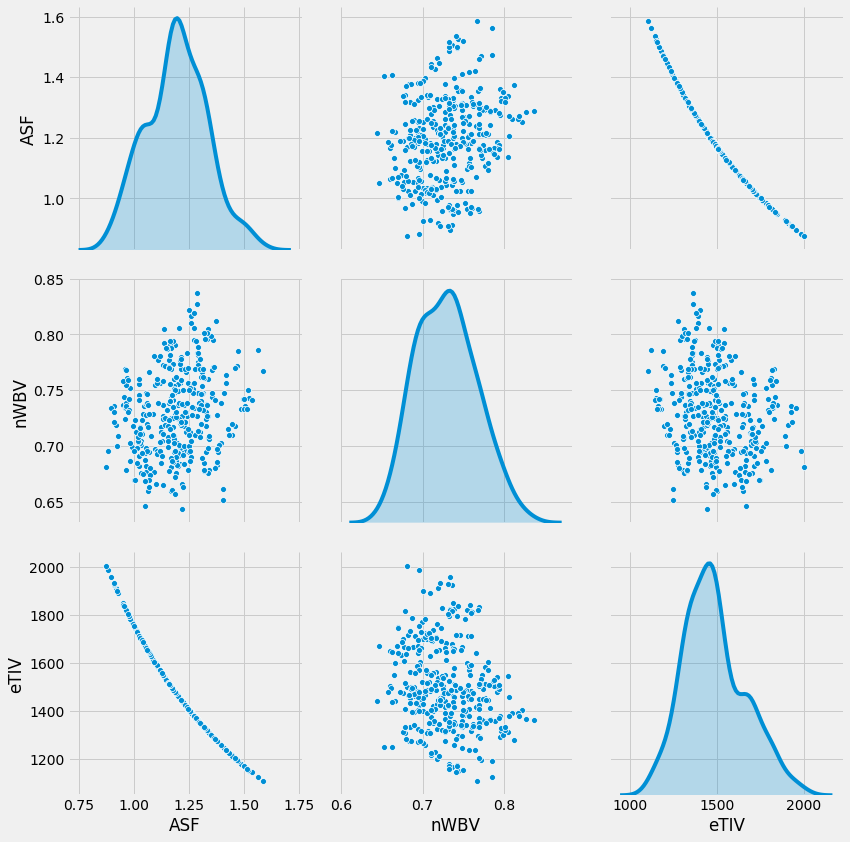

In [134]:
g = sns.pairplot(df[['ASF', 'nWBV', 'eTIV']],
                 diag_kind='kde',
                 height=4)
plt.savefig('Continuous.png')

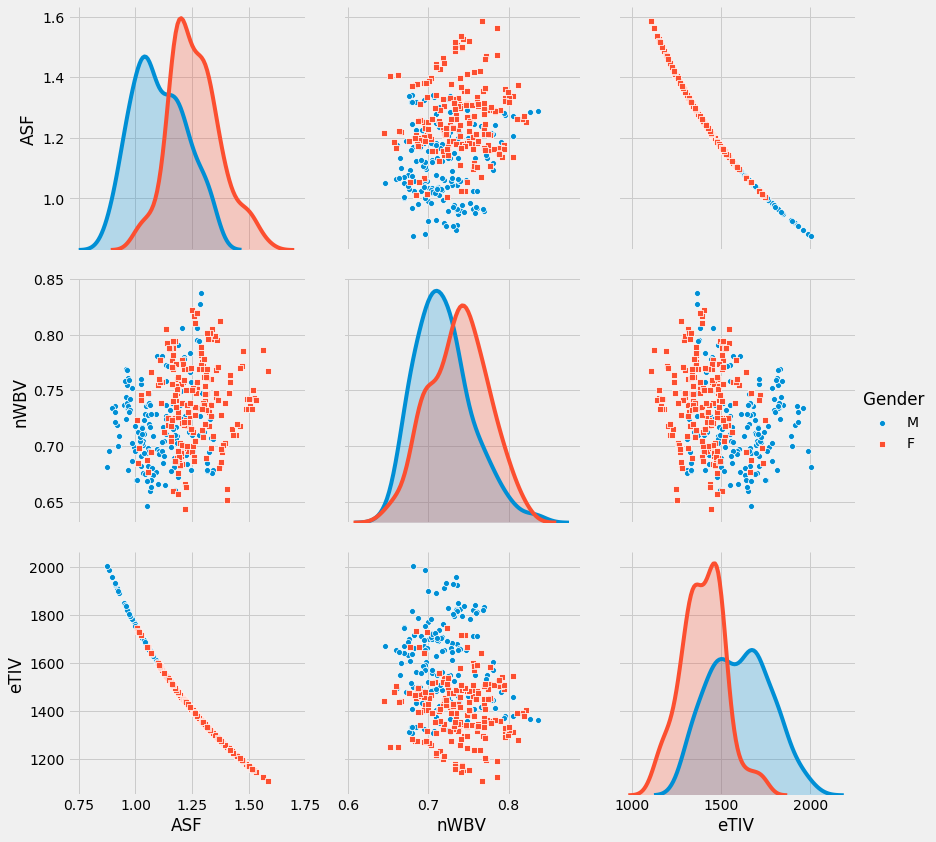

In [135]:
g = sns.pairplot(df[['ASF', 'nWBV', 'eTIV', 'Gender']],
                 hue='Gender',
                 markers= ['o', 's'],
                 height=4)
plt.savefig('Continous_Gender.png')

**Recap of Preliminary Analysis of Features**
> `MMSE`:  Based on EDA process over all , we may infer that a high `MMSE` scores covariate with a small `CDR` scores. This indicates that `MMSE` has influence on classification of the subject.
>
> `SES`: If we look at the `SES` socioeconomic status column, we can observe a high variation in its classes and also low (.05) correlation coefficient supports this phonemena. So we may suggest that `SES` class does not look like have an influence on the `CDR` score.
>
>`GENDER`:  Looks like gender is an influential factor on CDR score or for a subject to get diagnosed with dementia.
>
> `ASF eTIV nWBV`: While `ASF` Atlas scaling factor and `eTIV` estimated total intracranial volume have negative correlation between them, other pairs seem to uncorrolated. The negative correlation exists because of the computational process of eTIV which is computed as $$eTIV  = \frac{ICV_{Atlas}}{ASF}$$ according to FreeSurfer website.
>
> `Visit`: We have observed high positive correlation between `Visit` number of visits and `MR_Delay` so we can drop one of them as they are basically providing the similar information to the model. In other words we need to get collinearity out of the way.
>
> `EDUC SES Gender` has some effect on CDR score but there is not any strong relationship. 

<a href='#top' id='hypotest'>back to menu</a>

# Hypothesis Testing

**Null Hypothesis: There is no difference in respect to Gender. Females and Males are from the same distribution**

>This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [17]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSE_filled,SES_filled,Gender
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,27,4,M
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,0,88,14,2.0,30.0,0.0,2004,0.681,0.876,30,4,M
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,0,75,12,NaN,23.0,0.5,1678,0.736,1.046,23,4,M
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,0,76,12,NaN,28.0,0.5,1738,0.713,1.010,28,4,M
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,0,80,12,NaN,22.0,0.5,1698,0.701,1.034,22,4,M


In [19]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSE_filled,SES_filled,Gender
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,27,4,M
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,0,88,14,2.0,30.0,0.0,2004,0.681,0.876,30,4,M
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,0,75,12,NaN,23.0,0.5,1678,0.736,1.046,23,4,M
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,0,76,12,NaN,28.0,0.5,1738,0.713,1.010,28,4,M
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,0,80,12,NaN,22.0,0.5,1698,0.701,1.034,22,4,M


In [139]:
import scipy.stats as stats



# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = stats.sem(data1), stats.sem(data2)

    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    dfree = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = stats.t.ppf(1-(alpha/2), dfree)
    # calculate the p-value
    p = (1 - stats.t.cdf(abs(t_stat), dfree))*2
    # return everything
    return t_stat, dfree, cv, p, alpha


demented_females = (df[(df['Gender'] == 'F')]['Group'] == 'Demented')
demented_males = (df[(df['Gender'] == 'M')]['Group'] == 'Demented')

t_stat, dfree, cv, p, alpha = independent_ttest(demented_females,
                                                demented_males,
                                                alpha=0.05)

print('t=%.3f, df=%d, cv=%.3f, p=%.7f' % (t_stat, dfree, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('REJECT! the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('REJECT! the null hypothesis that  the means are equal.')

t=-5.098, df=371, cv=1.966, p=0.0000005
REJECT! the null hypothesis that the means are equal.
REJECT! the null hypothesis that  the means are equal.


In [140]:
# Validation of above results
t_statistic_, p_value_ = stats.ttest_ind(demented_females, demented_males)
print('t-statistic = {t} \np-value = {p}'.format(t=t_statistic_,p=p_value_))

t-statistic = -5.173584302895191 
p-value = 3.7674910982965996e-07


> The T-Test reults suggest that the samples are from different distributions. There is significant difference between genders of subjects being diagnosed Demented. 

                      

|[Previous: DataWrangling]()|____________ | [Next: Modeling]()|